In [ ]:
import warnings
#warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import heron
from heron.likelihood import TimeDomainLikelihoodModelUncertainty
from heron.models.lalnoise import AdvancedLIGO
from heron.models.lalsimulation import IMRPhenomPv2_FakeUncertainty
from heron.detector import AdvancedLIGOHanford, AdvancedLIGOLivingston

/home/daniel/repositories/ligo/heron/heron/models/__init__.py:3: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import antenna, MSUN_SI


In [ ]:
test_waveform = IMRPhenomPv2_FakeUncertainty(covariance=1e-10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import coordinates as coords
import astropy.units as u

In [ ]:
loc = {"m1": 20*u.solMass, "m2": 20*u.solMass, "distance": 500*u.Mpc, "inclination": 0, "f_min": 100*u.Hz, "f_ref": 300*u.Hz, "theta_jn": 0,  "phase": 0}
data = test_waveform.time_domain(loc,)
location = coords.SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
position = {"ra": float(location.ra.to(u.radian).value),
            "dec": float(location.dec.to(u.radian).value),
            "psi": 0,
}

In [ ]:

injection = test_waveform.time_domain(loc, times=np.linspace(-.05, .05, 1000)).project(detector=AdvancedLIGOHanford(), **position)
noise = AdvancedLIGO().time_series(times=injection.times.value)
injection = injection + noise

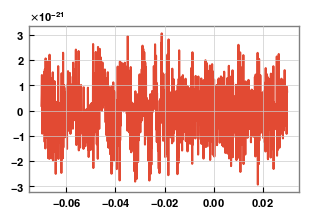

In [ ]:
plt.plot(injection.times, injection)

In [ ]:
likelihood = TimeDomainLikelihoodModelUncertainty(data=injection,
                                  psd=AdvancedLIGO(),
                                  detector=AdvancedLIGOHanford(),
                                  waveform=IMRPhenomPv2_FakeUncertainty(covariance=1e-14),
)                                  

In [ ]:
widths = np.linspace(10, 30, 20)
likelihoods = []
for w in widths:
    loc.update(position)
    loc.update({"m1": w})
    test = test_waveform.time_domain(loc).project(detector=AdvancedLIGOHanford(), **loc)
    likelihoods.append(
        likelihood(loc)
        )

K+C [[2.89627644e+36 2.89627642e+36 2.89627638e+36 ...
  2.88712001e+36 2.88709700e+36 2.88707396e+36]
 [2.89627642e+36 2.89627644e+36 2.89627642e+36 ...
  2.88714300e+36 2.88712001e+36 2.88709700e+36]
 [2.89627638e+36 2.89627642e+36 2.89627644e+36 ...
  2.88716595e+36 2.88714300e+36 2.88712001e+36]
 ...
 [2.88712001e+36 2.88714300e+36 2.88716595e+36 ...
  2.89627644e+36 2.89627642e+36 2.89627638e+36]
 [2.88709700e+36 2.88712001e+36 2.88714300e+36 ...
  2.89627642e+36 2.89627644e+36 2.89627642e+36]
 [2.88707396e+36 2.88709700e+36 2.88712001e+36 ...
  2.89627638e+36 2.89627642e+36 2.89627644e+36]]
W_0 [ 42362.93571025  75666.73902119 127190.14837489 ...
  29017.00948468 -47475.78252346 -43189.65114548]


NameError: name 'prit' is not defined

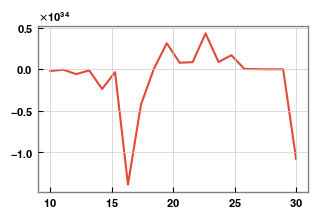

In [ ]:
plt.plot(widths, likelihoods)